In [13]:
import pandas as pd

# Load the dataset
file_path = '/Users/user/Desktop/INSY695/group project/Final Preprocessed Data.csv'
data = pd.read_csv(file_path)

# List of columns to remove
columns_to_keep = [
    "Income_Category_High",
    "Income_Category_Low",
    "Income_Category_Medium",
    "Complain",
    "Is_Parent",
    "Family_Size",
    "Recency",
    "Age",
    "Member_Year",
    "Total_amount",
    "Total_purchase",
    "NumWebVisitsMonth",
    "NumDealsPurchases",
    "Cmp_Attitude"
]

# Remove the columns from the dataset
data_cleaned = data[columns_to_keep]



In [14]:
import numpy as np
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler

Fuzzy C-Means

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

In [16]:
data_transposed = data_scaled.T
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_transposed, c=3, m=2, error=0.005, maxiter=1000, init=None)

# Cluster membership (each point's cluster)
cluster_membership = np.argmax(u, axis=0)

# Outputs
print("Fuzzy Partition Coefficient:", fpc)
print("Cluster Centers:\n", cntr)

Fuzzy Partition Coefficient: 0.3713181121200482
Cluster Centers:
 [[ 1.57791015e-02 -3.16714576e-03 -1.54598226e-02 -1.25054402e-02
   3.09263326e-01  2.50099309e-01 -3.13161225e-03 -4.97253706e-02
  -1.49793032e-02 -3.15518888e-01 -2.71893802e-01  2.36414727e-01
   1.01365263e-01 -1.63676380e-01]
 [ 6.76519245e-03  1.61561124e-04 -6.88711630e-03 -3.11562929e-03
  -8.19293691e-01 -6.26933487e-01  1.39001836e-02  9.93842064e-02
   1.59297210e-02  7.78858256e-01  6.21433081e-01 -6.22645525e-01
  -3.22821583e-01  3.87233344e-01]
 [ 1.53836701e-02 -3.10057750e-03 -1.50702119e-02 -1.21892775e-02
   3.06621437e-01  2.47375308e-01 -3.08737640e-03 -4.60263595e-02
  -1.28876338e-02 -3.08675897e-01 -2.63296981e-01  2.32771440e-01
   1.04251076e-01 -1.60932038e-01]]


In [24]:
# Add the cluster membership to the original dataset
data['Cluster'] = cluster_membership

# Show the first few rows to verify the cluster column has been added
print(data.head())

# Save the new dataframe with the cluster labels
data.to_csv('/Users/user/Desktop/INSY695/group project/Clustered_Data(FCM).csv', index=False) 

     ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  ...  Education_Master  Education_PhD  \
0              546              172  ...               0.0            0.0   
1                6                2  ...               0.0            0.0   
2              127              111  ...               0.0            0.0   
3               20               10  ...               0.0            0.0   
4              118               46  ...               0.0            1.0   

   Marital_Status_Alone  Marital_Status_Divorced  

In [17]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_scaled, cluster_membership)

print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.14387080959680668


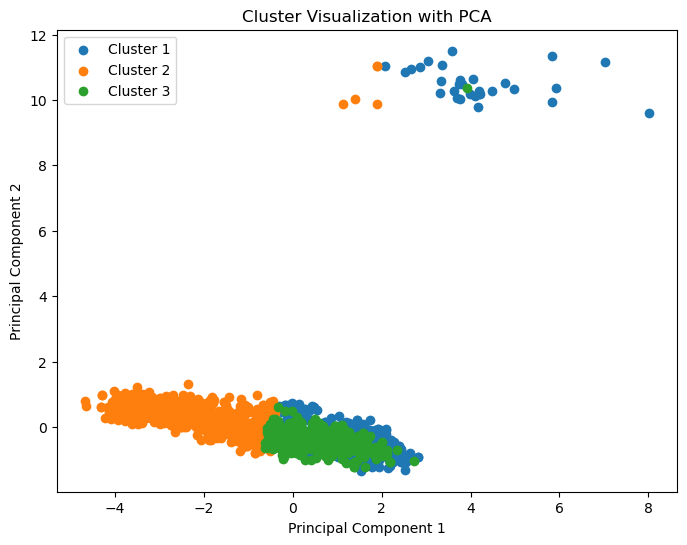

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plotting the results
plt.figure(figsize=(8, 6))
for i in range(3):  # assuming you have 3 clusters from your fuzzy clustering
    plt.scatter(data_pca[u.argmax(axis=0) == i, 0], data_pca[u.argmax(axis=0) == i, 1], label=f'Cluster {i+1}')
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


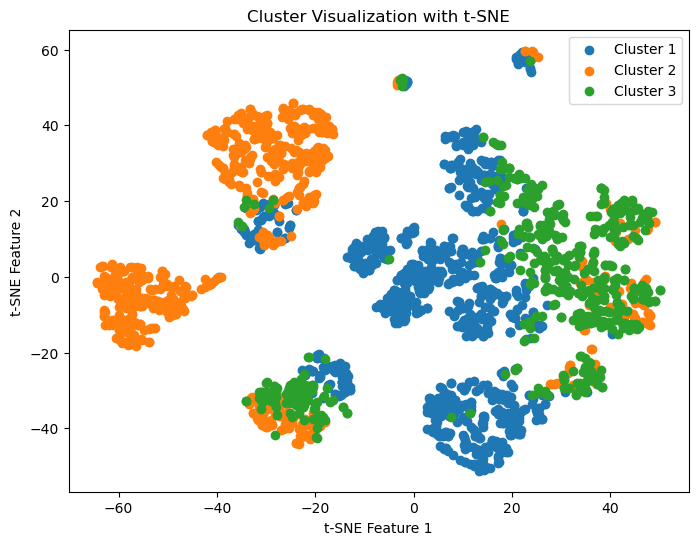

In [20]:
from sklearn.manifold import TSNE

# Perform t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Plotting the results
plt.figure(figsize=(8, 6))
for i in range(3):  # assuming you have 3 clusters
    plt.scatter(data_tsne[u.argmax(axis=0) == i, 0], data_tsne[u.argmax(axis=0) == i, 1], label=f'Cluster {i+1}')
plt.title('Cluster Visualization with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()


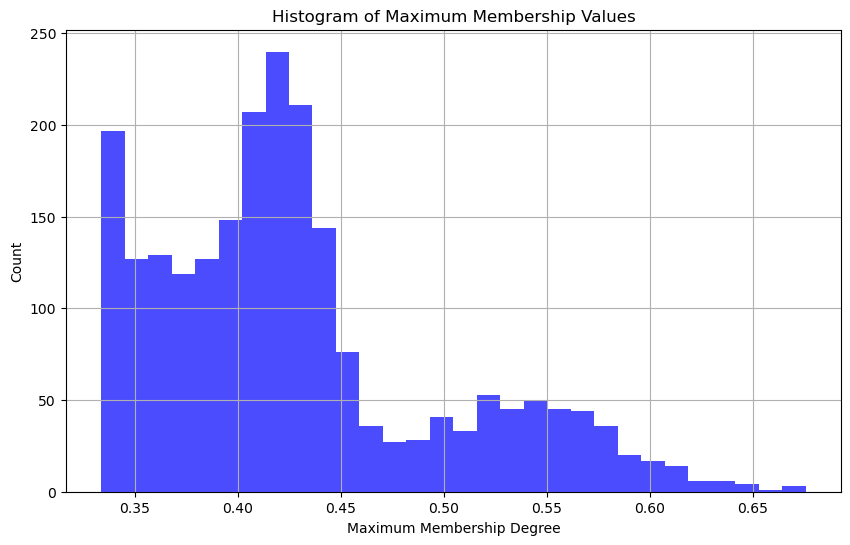

         Cluster 1    Cluster 2    Cluster 3  Max Membership
count  2234.000000  2234.000000  2234.000000     2234.000000
mean      0.353927     0.292512     0.353561        0.428651
std       0.077555     0.153837     0.076291        0.069915
min       0.161668     0.042252     0.162530        0.333542
25%       0.303653     0.165322     0.305153        0.378218
50%       0.374049     0.250960     0.375341        0.416592
75%       0.418338     0.391235     0.416420        0.450490
max       0.482847     0.675802     0.475626        0.675802


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'u' is your membership matrix from fuzzy clustering
# Each row in 'u' corresponds to a cluster and each column to a data point

# Convert membership matrix to a DataFrame for easier manipulation
membership_df = pd.DataFrame(u.T, columns=[f'Cluster {i+1}' for i in range(u.shape[0])])

# Add maximum membership and its cluster
membership_df['Max Membership'] = membership_df.max(axis=1)
membership_df['Predominant Cluster'] = membership_df.idxmax(axis=1)

# Histogram of maximum membership values to see how many points are strongly associated with a cluster
plt.figure(figsize=(10, 6))
plt.hist(membership_df['Max Membership'], bins=30, alpha=0.7, color='blue')
plt.title('Histogram of Maximum Membership Values')
plt.xlabel('Maximum Membership Degree')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Display some statistics about the memberships
print(membership_df.describe())


GMM

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_cleaned)

# Apply Gaussian Mixture Model for soft clustering
# We'll choose a number of components based on typical dataset sizes; this can be tuned later
gmm = GaussianMixture(n_components=5, random_state=0)
gmm.fit(data_normalized)

# Predict the probabilities of clusters
cluster_probs = gmm.predict_proba(data_normalized)

# Show the first few rows of cluster probabilities for verification
cluster_probs[:5]

data['Cluster'] = gmm.predict(data_normalized)
data.to_csv('/Users/user/Desktop/INSY695/group project/Clustered_Data(GMM).csv', index=False) 

In [26]:
cluster_probs[:5]

array([[0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [9.99999387e-001, 0.00000000e+000, 4.04747380e-175,
        0.00000000e+000, 6.12607193e-007],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [9.99999664e-001, 0.00000000e+000, 8.00564988e-196,
        0.00000000e+000, 3.36020792e-007],
       [9.99998613e-001, 0.00000000e+000, 3.98241491e-192,
        0.00000000e+000, 1.38650735e-006]])

In [27]:
from sklearn.metrics import silhouette_score

# Use the 'predict' method to obtain discrete cluster labels
cluster_labels = gmm.predict(data_normalized)

# Calculate the silhouette score using the normalized data and the cluster labels
silhouette_avg = silhouette_score(data_normalized, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : 0.19553838899926493


In [28]:
# Retrieve the centroids (means of the Gaussian distributions for each cluster)
centroids = gmm.means_

# Transform centroids back to original scale
centroids_original_scale = scaler.inverse_transform(centroids)

# Create a DataFrame to display centroids for each cluster for easier interpretation
centroids_df = pd.DataFrame(centroids_original_scale, columns=data_cleaned.columns)
centroids_df


,Income_Category_High,Income_Category_Low,Income_Category_Medium,Complain,Is_Parent,Family_Size,Recency,Age,Member_Year,Total_amount,Total_purchase,NumWebVisitsMonth,NumDealsPurchases,Cmp_Attitude
0,1.0,-1.084202e-19,-3.469447e-18,-1.734723e-18,1.000000e+00,3.023654,49.149017,46.640196,2.925868,284.327058,9.869773,6.007797,2.655620,0.000000
1,1.0,-3.794708e-19,-1.040834e-17,6.400000e-03,2.220446e-16,1.604800,49.299200,47.558400,2.976000,1121.892800,16.628800,3.358400,1.072000,0.368000
2,1.0,2.710505e-19,3.469447e-18,9.411765e-01,1.000000e+00,3.117647,52.176471,48.470588,3.117647,368.176470,10.588235,6.117647,3.470588,0.058824
3,0.0,2.777778e-02,9.722222e-01,1.734723e-18,6.944444e-01,2.333333,44.916667,38.916667,3.166667,128.638889,6.000000,9.250000,3.472222,0.083333
4,1.0,-7.589415e-19,-3.122502e-17,-1.387779e-17,1.000000e+00,2.881952,49.088858,48.834676,3.105545,885.814143,15.554263,6.031617,3.260676,0.690264


In [29]:

# Get the overall mean of the features for comparison
overall_mean = data_cleaned.mean()

# Print out the features characterizing each cluster
for i, centroid in centroids_df.iterrows():
    print(f"Cluster {i} characteristics:")
    above_mean_features = centroid > overall_mean
    below_mean_features = centroid < overall_mean
    
    # Features where the cluster centroid is above the overall mean
    print("Features with high mean values:")
    print(centroid[above_mean_features].sort_values(ascending=False))
    
    # Features where the cluster centroid is below the overall mean
    print("\nFeatures with low mean values:")
    print(centroid[below_mean_features].sort_values())
    
    print("\n" + "-"*80 + "\n")


Cluster 0 characteristics:
Features with high mean values:
Recency                 49.149017
NumWebVisitsMonth        6.007797
Family_Size              3.023654
NumDealsPurchases        2.655620
Income_Category_High     1.000000
Is_Parent                1.000000
Name: 0, dtype: float64

Features with low mean values:
Income_Category_Medium   -3.469447e-18
Complain                 -1.734723e-18
Income_Category_Low      -1.084202e-19
Cmp_Attitude              0.000000e+00
Member_Year               2.925868e+00
Total_purchase            9.869773e+00
Age                       4.664020e+01
Total_amount              2.843271e+02
Name: 0, dtype: float64

--------------------------------------------------------------------------------

Cluster 1 characteristics:
Features with high mean values:
Total_amount            1121.8928
Recency                   49.2992
Age                       47.5584
Total_purchase            16.6288
Member_Year                2.9760
Income_Category_High       1.0000

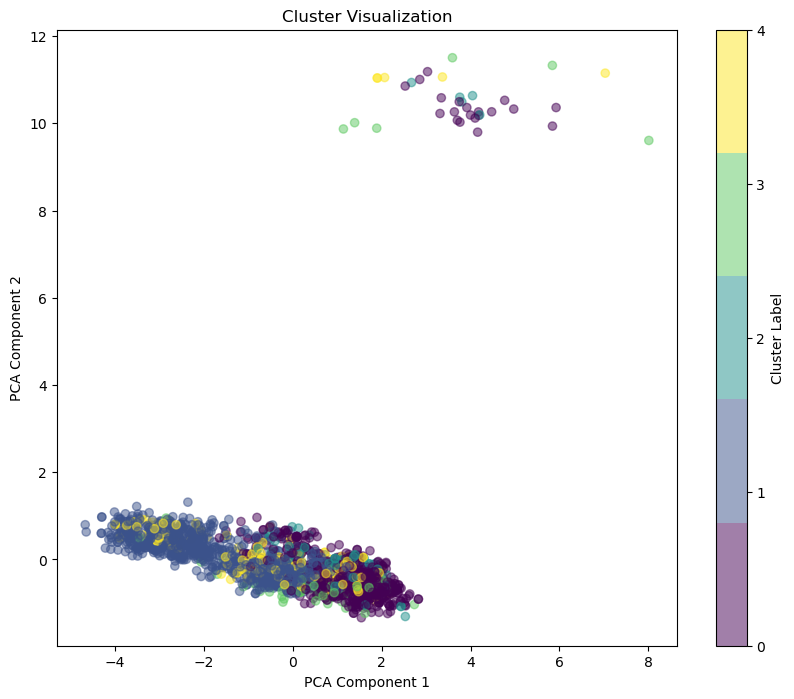

In [31]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Assuming 'data_normalized' and 'clusters' are already defined
# Fit PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Create a color map with discrete colors for each cluster
cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, 5)))

# Plotting the results with distinct colors
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap=cmap, alpha=0.5)
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, ticks=np.arange(0, 5), label='Cluster Label')
plt.show()
